In [1]:
import torch 
import torchvision
import numpy as np
import PIL

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 8]

In [17]:
DATA_PATH = './data'

In [22]:
def load_data(path):
    transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
    ])
    
    dataset = torchvision.datasets.ImageFolder(root=path, transform=transforms)
    return dataset 
dataset = load_data(DATA_PATH)

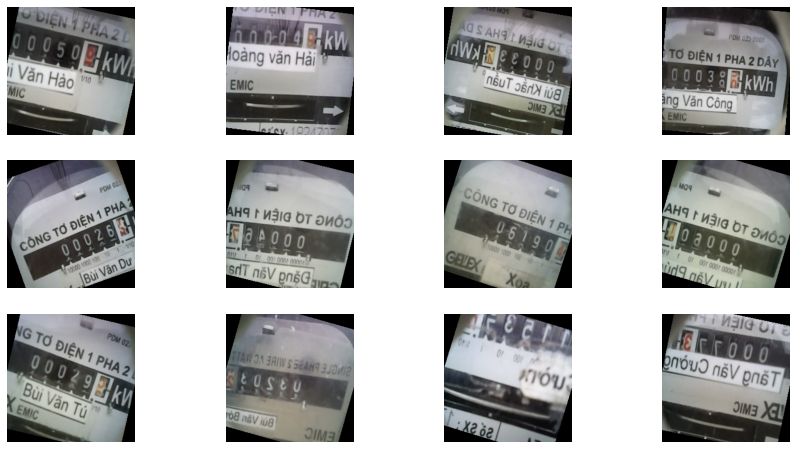

In [48]:
index = 0
fig, axs = plt.subplots(3, 4)
for i in range(3):
    for j in range(4):        
        axs[i][j].imshow(np.asarray((dataset[index][0])))
        axs[i][j].axis('off')
        index += 1